In [1]:
# pip install numpy==1.18.2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Import from local directory
import sys
sys.path.append('/home/costa/fnn-master/fnn-master/fnn')
from models import LSTMEmbedding, MLPEmbedding
from regularizers import FNN
import h5py
import numpy.ma as ma
plt.rcParams['lines.linewidth'] = .1
plt.rcParams['axes.prop_cycle'] = plt.cycler(color="k") 

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
f = h5py.File("autobuses_processed_data.h5","r")
scaled_X = ma.array(f["scaled_x"])
scaled_X.mask = ma.array(f["x_mask"])
minX = np.array(f["minX"])
maxX = np.array(f["maxX"])
f.close()

In [37]:
model = LSTMEmbedding(24,
                      time_window=24,
                      latent_regularizer=FNN(1),
                      random_state=0
                      )
coords = model.fit_transform(scaled_X[:1000])

In [38]:
def inverse_scaler(scaled_x,minX,maxX):
    return scaled_x*maxX-minX

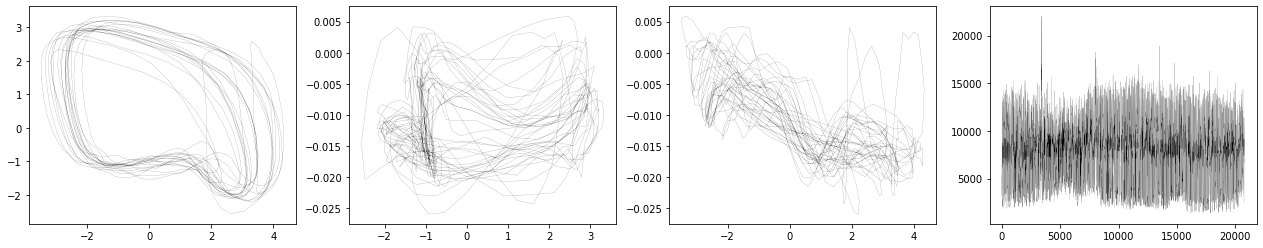

In [39]:
%matplotlib inline
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(22, 4))
ax[0].plot(coords[:, 0], coords[:, 1])
ax[1].plot(coords[:, 1], coords[:, 2])
ax[2].plot(coords[:, 0], coords[:, 2])
ax[3].plot(inverse_scaler(scaled_X,minX,maxX))
plt.savefig('atractor.jpg')